In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
data=pd.read_excel('Somon.tj home price.xlsx')
data.head()

,cost,market,market_code,remodel,rooms,floor,area
0,2850000,Новостройка,1,Новый ремонт,3,15,200
1,2000000,Новостройка,1,Новый ремонт,5,5,200
2,1800000,Новостройка,1,Без ремонта (коробка),3,5,200
3,450000,Вторичный рынок,2,С ремонтом,6,1,200
4,430000,Вторичный рынок,2,С ремонтом,5,1,200


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, log_loss, classification_report, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor


from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8415 entries, 0 to 8414
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cost         8415 non-null   int64 
 1   market       8415 non-null   object
 2   market_code  8415 non-null   int64 
 3   remodel      8415 non-null   object
 4   rooms        8415 non-null   int64 
 5   floor        8415 non-null   int64 
 6   area         8415 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 460.3+ KB


In [5]:
data['remodel'].value_counts()

С ремонтом               3319
Без ремонта (коробка)    3011
Новый ремонт             2085
Name: remodel, dtype: int64

In [6]:
data.loc[data['remodel']=='Без ремонта (коробка)', 'remodel_code']=0
data.loc[data['remodel']=='С ремонтом', 'remodel_code']=1
data.loc[data['remodel']=='Новый ремонт','remodel_code']=2
data.loc[data['market']=='Новостройка','market_code']=0
data.loc[data['market']=='Вторичный рынок','market_code']=1

In [7]:
import matplotlib.pyplot as plt

(array([ 63., 107., 142., 241., 268., 440., 452., 432., 777., 549., 687.,
        318., 551., 476., 264., 363., 318., 281., 155., 211., 147.,  88.,
        276.,  77., 131.,  49.,  51.,  89.,  29.,  47.,  54.,  35.,  32.,
         36.,  26.,  10.,  18.,  13.,  17.,  11.,   6.,  15.,   6.,   5.,
         12.,   4.,   6.,  15.,   9.,   6.]),
 array([ 21.  ,  24.58,  28.16,  31.74,  35.32,  38.9 ,  42.48,  46.06,
         49.64,  53.22,  56.8 ,  60.38,  63.96,  67.54,  71.12,  74.7 ,
         78.28,  81.86,  85.44,  89.02,  92.6 ,  96.18,  99.76, 103.34,
        106.92, 110.5 , 114.08, 117.66, 121.24, 124.82, 128.4 , 131.98,
        135.56, 139.14, 142.72, 146.3 , 149.88, 153.46, 157.04, 160.62,
        164.2 , 167.78, 171.36, 174.94, 178.52, 182.1 , 185.68, 189.26,
        192.84, 196.42, 200.  ]),
 <BarContainer object of 50 artists>)

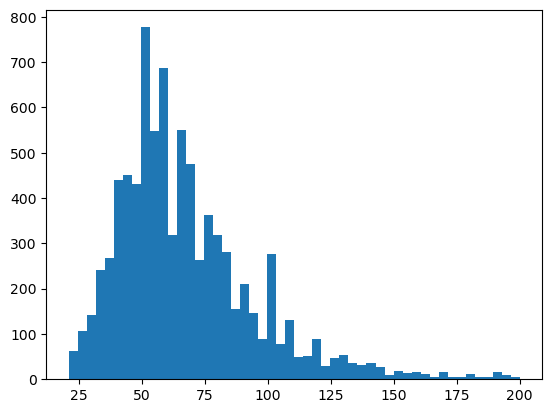

In [8]:
plt.hist(data.area, bins=50)

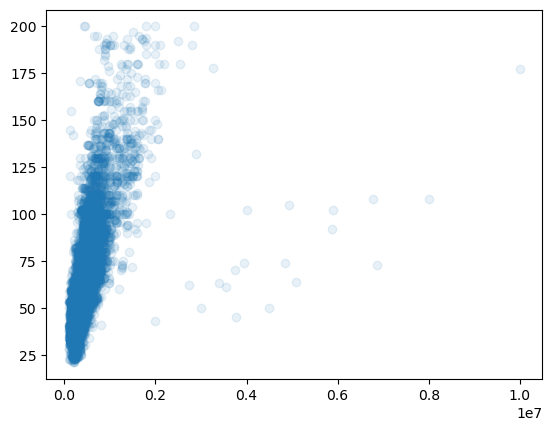

In [9]:
plt.scatter(data.cost, data.area, alpha=0.1)

<Axes: xlabel='area', ylabel='cost'>

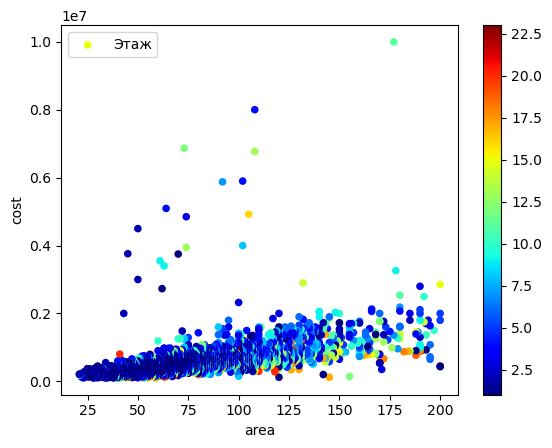

In [10]:
data.plot(kind='scatter', x='area', y='cost', c=data.floor, cmap='jet', label='Этаж')

<Axes: xlabel='market_code', ylabel='cost'>

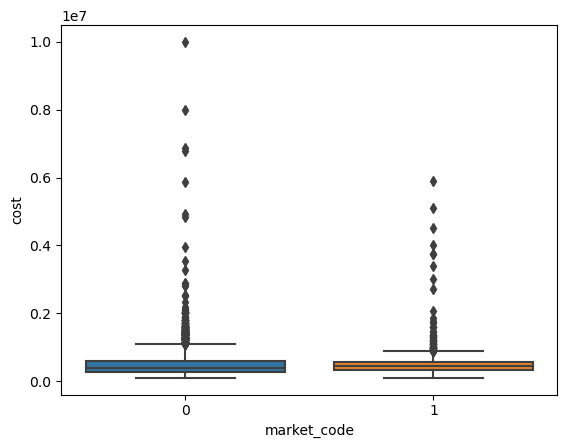

In [11]:
sns.boxplot(x=data.market_code, y=data.cost)

<Axes: xlabel='remodel_code', ylabel='cost'>

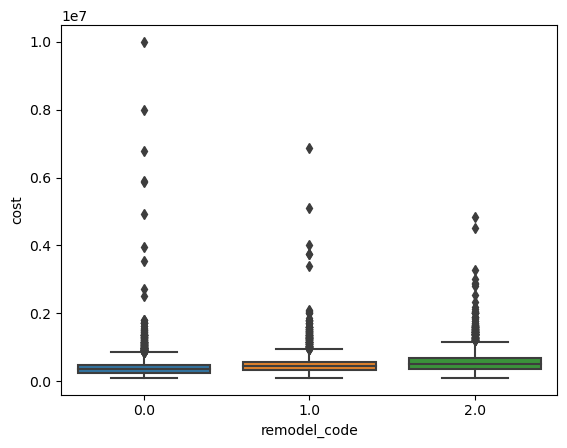

In [12]:
sns.boxplot(x=data.remodel_code, y=data.cost)

In [13]:
from scipy.stats import norm 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_48312\1119197534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

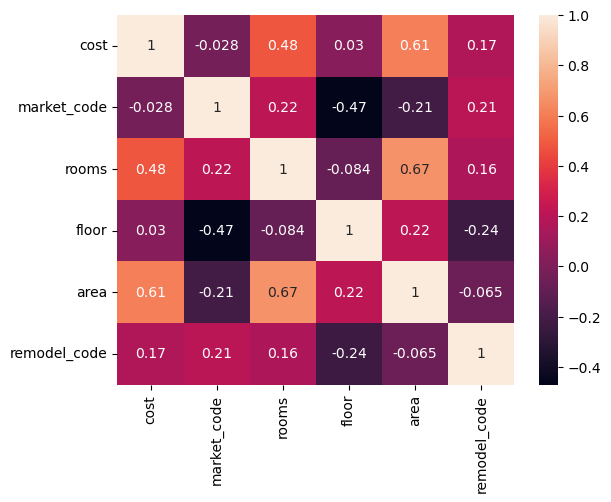

In [14]:
sns.heatmap(data.corr(), annot=True)

<Axes: xlabel='area', ylabel='Density'>

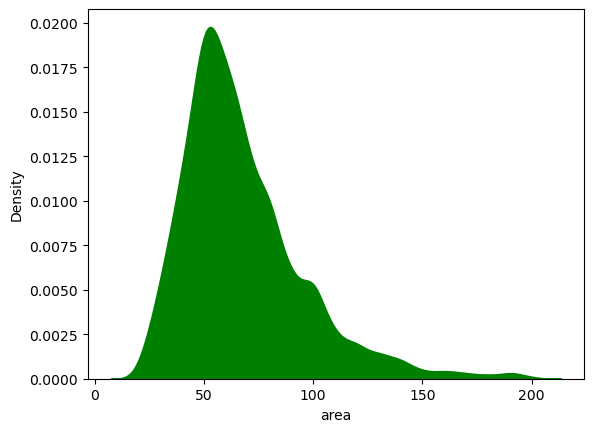

In [15]:
sns.kdeplot(data.area, color='green', fill=True, alpha=1)

<Axes: xlabel='area', ylabel='Density'>

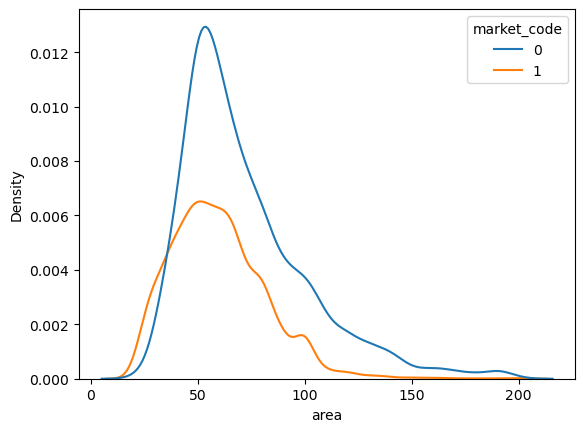

In [16]:
sns.kdeplot(data=data,x='area', hue='market_code')

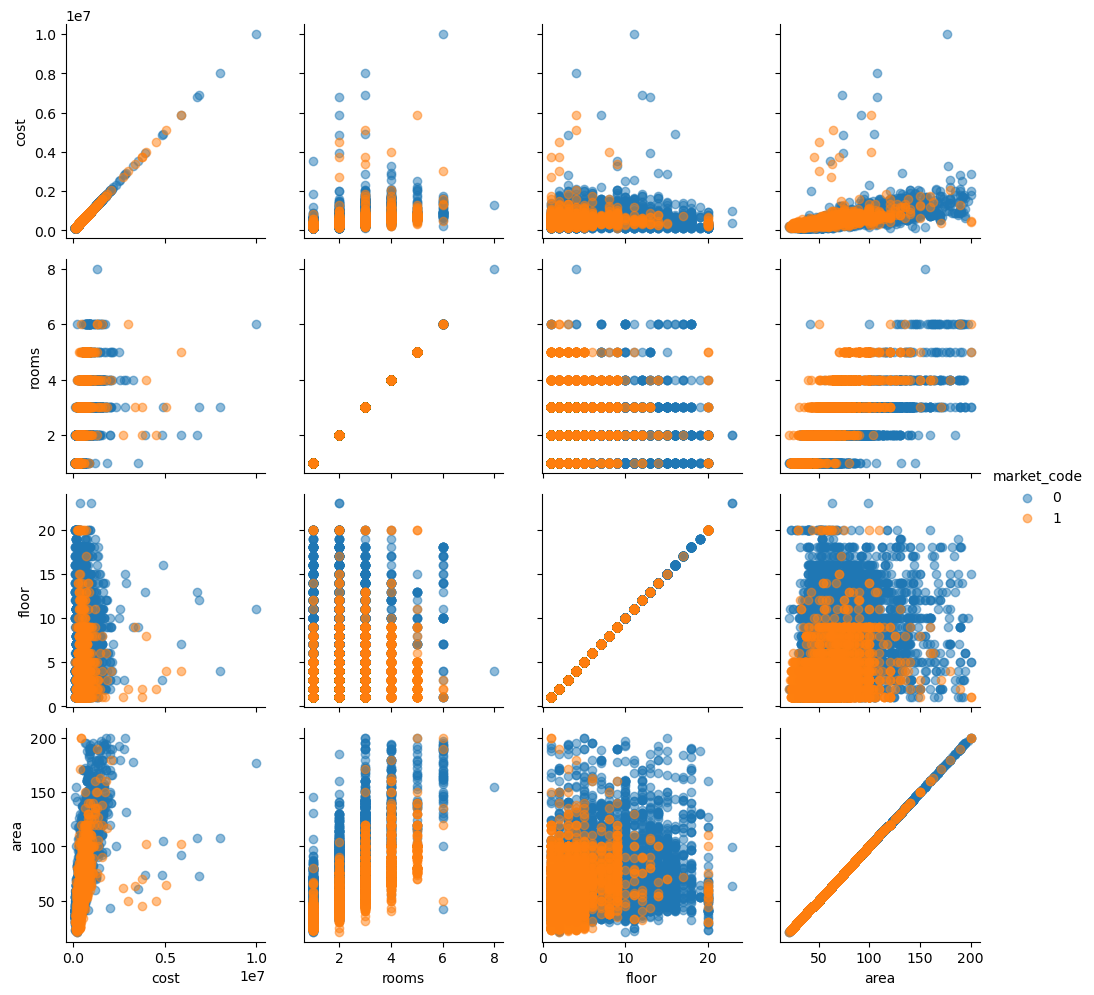

In [17]:
matrix=sns.PairGrid(data, vars=['cost',  'rooms', 'floor', 'area'],hue='market_code')
matrix.map(plt.scatter, alpha=0.5)
matrix.add_legend()

In [18]:
data=data.drop(['market'], axis=1)

In [19]:
data=data.drop(['remodel'], axis=1)

In [20]:
y=data['cost']
X=data.drop(['cost'], axis=1)

In [21]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [22]:
lr=LinearRegression()

In [23]:
 lr.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = lr.predict(X_train)


In [25]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.4016205046113326
0.49008951836093595


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

preds = rf_model.predict(X_test)

print('Random Forest: ', r2_score(y_test, preds))

Random Forest:  0.3086612625731794


In [27]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

preds = dt.predict(X_train)

r2_score(y_train, preds)

0.8964152452980201

In [30]:
import pickle
pickle_out = open("Somon.tj_home_price.pkl","wb")
pickle.dump(lr, pickle_out)
pickle_out.close()
